In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps
xps.use('xenonnt')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils import k0

## 6

In [3]:
def plot(lam, nf, ns, nc, h, te=True, vmax=3, xlim=[0, 10]):
    if not te:
        raise NotImplementedError
    
    b = np.linspace(0, 1, 10001)

    a = (ns ** 2 - nc ** 2) / (nf ** 2 - ns ** 2)
    # b = (neff ** 2 - ns ** 2) / (nf ** 2 - ns ** 2)
    
    # V * (1 - b) ** 0.5 = v * np.pi + np.arctan((b / (1 - b)) ** 0.5) + np.arctan(((b + a) / (1 - b)) ** 0.5)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    
    for v in range(0, vmax + 1):
        V = v * np.pi + np.arctan((b / (1 - b)) ** 0.5) + np.arctan(((b + a) / (1 - b)) ** 0.5)
        V /= 1 - b
        ax.plot(V, b)

    V_lam = k0(lam) * h * (nf ** 2 - ns ** 2) ** 0.5
    ax.axvline(V_lam, linestyle='dashed', color=xps.colors['grey'])

    ax.set_xlim(*xlim)
    ax.set_ylim(0, 1)
    
    ax.set_xlabel('$V$')
    ax.set_ylabel('$b$')
    
    plt.show()

In [4]:
nf = 5.0
ns = 4.0
nc = 3.0
h = 1 / (2 * np.pi)

In [5]:
a = (ns ** 2 - nc ** 2) / (nf ** 2 - ns ** 2)
lam = h * 2 * np.pi * (nf ** 2 - ns ** 2) ** 0.5 / np.arctan(a)

In [6]:
lam

np.float64(4.5382815243608166)

/tmp/ipykernel_2773047/2786318502.py:15: RuntimeWarning: divide by zero encountered in divide
  V = v * np.pi + np.arctan((b / (1 - b)) ** 0.5) + np.arctan(((b + a) / (1 - b)) ** 0.5)
/tmp/ipykernel_2773047/2786318502.py:16: RuntimeWarning: divide by zero encountered in divide
  V /= 1 - b


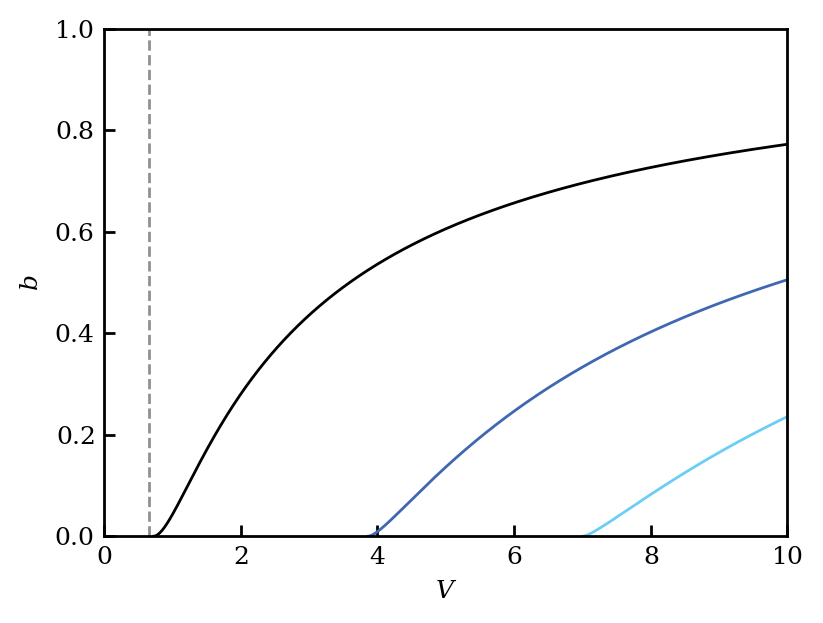

In [7]:
plot(lam, nf, ns, nc, h, te=True, vmax=3)